In [2]:
import pandas as pd
import numpy as np

In [3]:
import plotly.express as py
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_csv('train.csv')
df_train.name = 'train'

df_oil = pd.read_csv('oil.csv')
df_oil.name = 'oil'

df_stores = pd.read_csv('stores.csv')
df_stores.name = 'stores'

df_transactions = pd.read_csv('transactions.csv')
df_transactions.name = 'transactions'

df_holidays = pd.read_csv('holidays_events.csv')
df_holidays.name = 'holidays'

dataframes = [df_train, df_oil, df_stores, df_transactions, df_holidays]

# Description

The dataset contains the historical sales data for a set of stores. It includes information on store sales, including variables related to the store, the sales itself, and specific features like promotions.

## Data Files

The dataset is split into the following files:

1. **train.csv** - Contains the historical sales data.
2. **test.csv** - Contains the test data that you will use to generate forecasts.
3. **stores.csv** - Contains metadata about the stores.
4. **oil.csv** - Contains oil prices data.
5. **holidays_events.csv** - Contains information about holidays and events.
6. **sample_submission.csv** - Contains a sample submission file that you will use as a template for your submission.

## File Descriptions

### `train.csv`

- **id**: Unique identifier for the row.
- **date**: The date of the record.
- **store_nbr**: The number of the store.
- **family**: The category of the product.
- **sales**: The amount of sales.
- **onpromotion**: The number of items on promotion.

### `test.csv` -> used for prediction

- **id**: Unique identifier for the row.
- **date**: The date of the record.
- **store_nbr**: The number of the store.
- **family**: The category of the product.
- **onpromotion**: The number of items on promotion.

### `stores.csv`

- **store_nbr**: The number of the store.
- **city**: The city where the store is located.
- **state**: The state where the store is located.
- **type**: The type of store.
- **cluster**: A cluster identifier for grouping stores.

### `oil.csv`

- **date**: The date of the record.
- **dcoilwtico**: The West Texas Intermediate (WTI) crude oil price in USD.

### `holidays_events.csv`

- **date**: The date of the holiday/event.
- **type**: The type of holiday/event (e.g., public, religious, etc.).
- **locale**: The locale of the holiday/event (e.g., regional, local, etc.).
- **locale_name**: The name of the locale.
- **description**: Description of the holiday/event.

### `sample_submission.csv`

- **id**: Unique identifier for the row.
- **sales**: Placeholder for your forecasted sales values.

## Additional Notes

- **Data Granularity**: The data is provided at a daily granularity.
- **Promotions**: `onpromotion` indicates the number of items being promoted and can be zero.
- **Sales**: Sales data is given in units.

Remember to handle missing values and perform necessary preprocessing to make the data suitable for your forecasting models.


# Preprocessing the data

In [5]:
for i in dataframes:
    print(i.info(),'\n','-'*60)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None 
 ------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None 
 ------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     

In [6]:
for i in dataframes:
    print(i.name, '\n', i.isna().sum(),'\n','-'*60)

train 
 id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64 
 ------------------------------------------------------------
oil 
 date           0
dcoilwtico    43
dtype: int64 
 ------------------------------------------------------------
stores 
 store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64 
 ------------------------------------------------------------
transactions 
 date            0
store_nbr       0
transactions    0
dtype: int64 
 ------------------------------------------------------------
holidays 
 date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64 
 ------------------------------------------------------------


As we can see some of the date columns are not in datetime from pandas, also there are some missing values in oil

In [7]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_transactions['date'] = pd.to_datetime(df_transactions['date'])
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

In [8]:
#make oil price column name more explicit
df_oil.rename(columns = {'dcoilwtico' : 'oil_price'}, inplace = True)

In [9]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1218 non-null   datetime64[ns]
 1   oil_price  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


### Treating missing data

In [10]:
df_verify = df_oil.copy()
df_verify['oil_price'] = df_verify['oil_price'].interpolate().bfill()

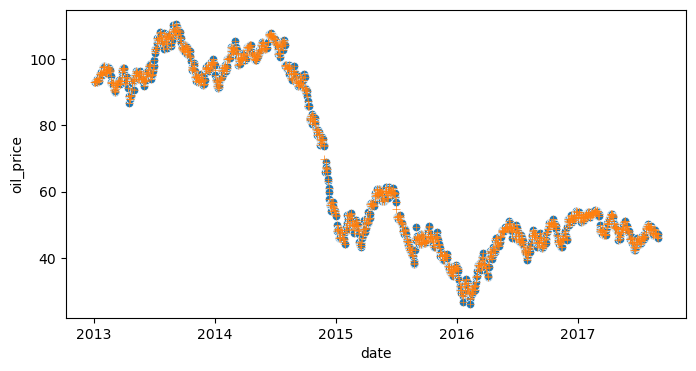

In [11]:
fig = plt.figure(figsize=(8,4))
sns.scatterplot(df_oil, x='date', y='oil_price')
sns.scatterplot (df_verify, x='date', y='oil_price', marker = '+')

plt.show()

In [12]:
#firstly let's approach the oil prices missing using interpolation and backfill for the first value.

df_oil['oil_price'] = df_oil['oil_price'].interpolate().bfill()
df_oil.isna().sum()

date         0
oil_price    0
dtype: int64

## Relation of each dataset

In [13]:
df_train.head(1)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0


In [14]:
df_transactions.head(1)

,date,store_nbr,transactions
0,2013-01-01,25,770


In [15]:
df_oil.head(1)

,date,oil_price
0,2013-01-01,93.14


In [39]:
df_stores.head(1)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13


In [40]:
df_holidays.head(1)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False


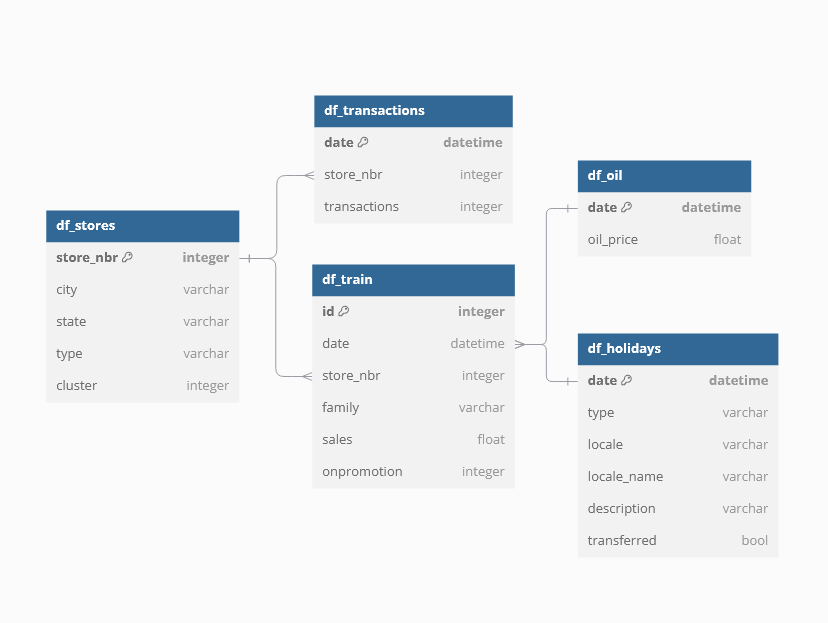

# What exactly do we need to predict?

The challenge is to predict the sales for the days whithin the test dataset.\
After understing the relation between each dataset, we need to see how the data is divided inside the main dataset (train and test).

In [24]:
df_test = pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [25]:
df_test['date'] = pd.to_datetime(df_test['date'])

In [38]:
df_test['date'].max() - df_test['date'].min()
#remembering to count the initial date

Timedelta('15 days 00:00:00')

In [44]:
len(df_test['family'].unique())

33

In [36]:
len(df_test['store_nbr'].unique())

54

In [43]:
x = 16 *33 *54
if x == len(df_test):
    print('We need to predict 16 days, starting in August 15th (included) and ending in August 31st (included) \nFor every store and family of products')
else:
    print('Something is not matching')

We need to predict 16 days, starting in August 15th (included) and ending in August 31st (included) 
For every store and family of products


In [73]:
dict = {}
for store, family in zip(df_train['store_nbr'].unique(), df_train['family'].unique()):
    dict["store_"+str(store)+"_family_"+str(family)] = (df_train[(df_train['store_nbr'] == store) & (df_train['family'] == family)])

In [77]:
dict['store_1_family_AUTOMOTIVE']

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1782,1782,2013-01-02,1,AUTOMOTIVE,2.0,0
3564,3564,2013-01-03,1,AUTOMOTIVE,3.0,0
5346,5346,2013-01-04,1,AUTOMOTIVE,3.0,0
7128,7128,2013-01-05,1,AUTOMOTIVE,5.0,0
...,...,...,...,...,...,...
2991978,2991978,2017-08-11,1,AUTOMOTIVE,1.0,0
2993760,2993760,2017-08-12,1,AUTOMOTIVE,6.0,0
2995542,2995542,2017-08-13,1,AUTOMOTIVE,1.0,0
2997324,2997324,2017-08-14,1,AUTOMOTIVE,1.0,0


The var ``dict`` contains each dataframe that we need

## Prophet (Additive model of Linear Regression)

### Sazonality?

In [18]:
total_sales = pd.DataFrame(round(df_train.groupby(by=[df_train['date']])['sales'].sum()))

<Axes: xlabel='date'>

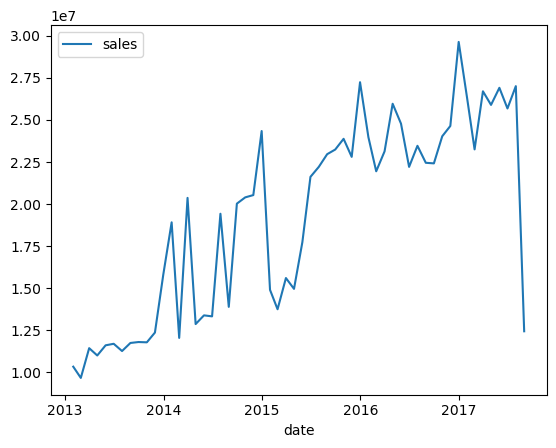

In [20]:
sns.lineplot(total_sales.groupby(pd.Grouper(freq='M')).sum())

In [21]:
total_sales.reset_index(inplace=True)

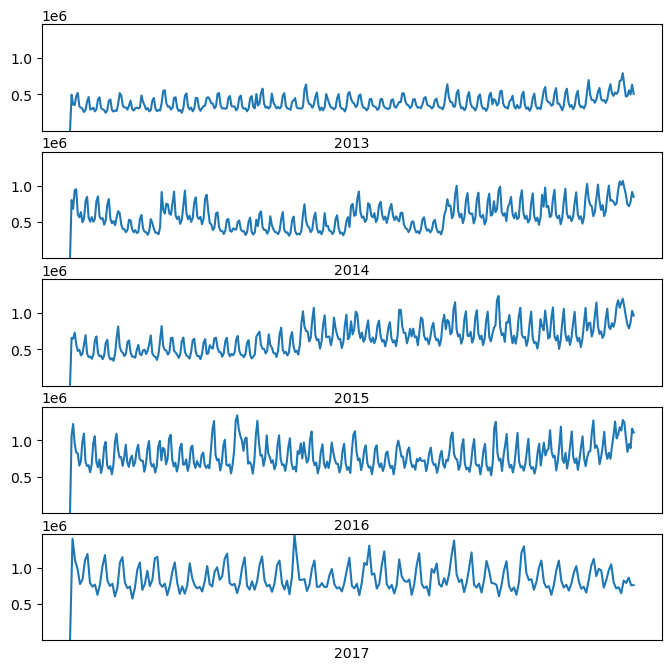

In [22]:
years = set(list(total_sales['date'].dt.year))

fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5,1, figsize=(8,8))
ax0.plot(total_sales[total_sales['date'].dt.year == 2013].sales)
ax0.set_xlabel('2013')
ax1.plot(total_sales[total_sales['date'].dt.year == 2014].sales)
ax1.set_xlabel('2014')
ax2.plot(total_sales[total_sales['date'].dt.year == 2015].sales)
ax2.set_xlabel('2015')
ax3.plot(total_sales[total_sales['date'].dt.year == 2016].sales)
ax3.set_xlabel('2016')
ax4.plot(total_sales[total_sales['date'].dt.year == 2017].sales)
ax4.set_xlabel('2017')

for i in [ax0, ax1, ax2, ax3, ax4]:
    i.tick_params(axis='x', which='both',bottom=False, top=False, labelbottom=False)
    i.set_ylim(total_sales['sales'].min(), total_sales['sales'].max())

plt.show()

We can see a sazonality occurring during the year. The year 2017 is incomplete and it ends in August
* Every year starts with no sales (maybe effect of a holiday)


In [27]:
''''#for the baseline model i thought about using prophet (Additive model of Linear regression)

from prophet import Prophet

SyntaxError: incomplete input (1692080812.py, line 1)

In [ ]:
'''#in order to use prophet I need to tranform my train dataset columns with readable names for the model
df_prophet = df_train[['date', 'sales']].rename(columns={'date' : 'ds',  #ds = datestamp
                                                         'sales' : 'y'}) #y = dependant var

model = Prophet(yearly_seasonality=True)
model.fit(df_prophet)
future = model.make_future_dataframe(periods=len(df_test), freq='D')

In [ ]:
prediction = model.predict(future)

In [ ]:
prediction

In [ ]:
df_test